<a href="https://colab.research.google.com/github/romeshlulla/ADS_Experiments/blob/main/ADS_Exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Liabraries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

### **Read CSV**

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

### **Describe**

In [ ]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,3.0000,6.00000,9.0000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,79.00000,117.0000,140.25000,167.0000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,38.70000,72.0000,80.00000,88.0000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,21.80000,32.0000,36.60000,41.5000,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.14035,0.3725,0.62625,0.8786,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,29.0000,41.00000,51.0000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00


### **Top 5 Attributes** (Using Correlation With Outcome)

In [ ]:
correlation_matrix = df.corr()
outcome_correlation = correlation_matrix['Outcome'].drop('Outcome')
top_5_attributes = outcome_correlation.abs().sort_values(ascending=False).head(5)
print("Top 5 attributes with highest correlation with Outcome:")
print(top_5_attributes)

Top 5 attributes with highest correlation with Outcome:
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


### **Missing Values**

In [ ]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_value_counts = df[columns_to_check].eq(0).sum()
print("Number of rows with zero values in each specified column:")
print(zero_value_counts)

Number of rows with zero values in each specified column:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
def missing_percent(df):
        mis_val = df.isnull().sum()

        mis_percent = 100 * df.isnull().sum() / len(df)

        mis_table = pd.concat([mis_val, mis_percent], axis=1)

        mis_columns = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : 'Percent of Total Values'})

        mis_columns = mis_columns[
            mis_columns.iloc[:,1] != 0].sort_values(
        'Percent of Total Values', ascending=False).round(2)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_columns.shape[0]) +
              " columns that have missing values.")

        return mis_columns

In [ ]:
miss_cols_info = missing_percent(df)
miss_cols_info

Your selected dataframe has 9 columns.
There are 5 columns that have missing values.


,Missing Values,Percent of Total Values
Insulin,374,48.70
SkinThickness,227,29.56
BloodPressure,35,4.56
BMI,11,1.43
Glucose,5,0.65


### **Outliers** (*Using* Interquartile Range)

In [ ]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def print_outlier_count(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    print(f"Outliers count in {column}: {outliers_count}")
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

for column in columns_to_check:
    print_outlier_count(column)

Outliers count in Glucose: 0
Outliers count in BloodPressure: 14
Outliers count in SkinThickness: 3
Outliers count in Insulin: 25
Outliers count in BMI: 5


## **Data Imputation**

### 1) Drop Missing Data

1.1)Dropping columns with nan values

In [ ]:
df_drop = df.copy()

In [ ]:
drop_cols = miss_cols_info[miss_cols_info['Percent of Total Values'] > 25]
drop_cols

,Missing Values,Percent of Total Values
Insulin,374,48.70
SkinThickness,227,29.56


In [ ]:
col_names = drop_cols.index.tolist()
col_names

['Insulin', 'SkinThickness']

In [ ]:
df_drop.drop(col_names, axis = 1, inplace=True)
df_drop.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


1.2) Dropping rows with nan values

In [ ]:
df_drop_rows = df.copy()

In [ ]:
df_drop_rows=df_drop_rows.dropna(subset=col_names)
df_drop_rows.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1


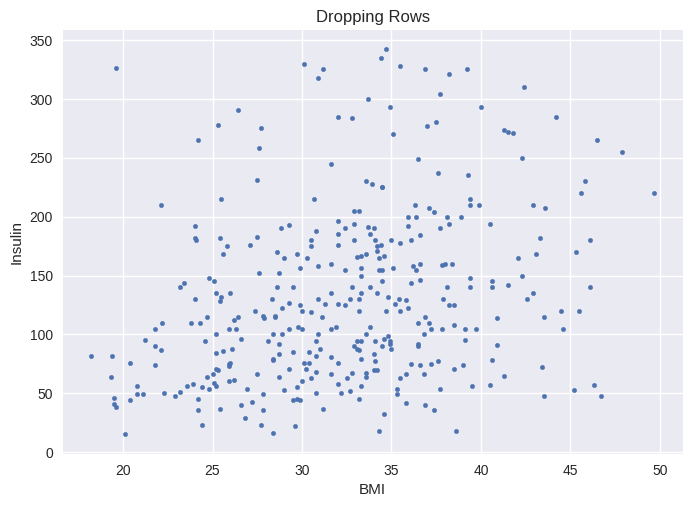

In [ ]:
plt.style.use('seaborn')
fig = plt.Figure()
fig = df_drop_rows.plot(x="BMI", y='Insulin', kind='scatter',
                    s = 10,
                    title='Dropping Rows', colorbar=False)

### 2) Simple Imputation Methods

2.1) Mean İmputation

In [ ]:
df_mean = df.copy()

In [ ]:
round(df_mean['Insulin'].mean(), 2)

132.39

In [ ]:
mean_imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
df_mean['Insulin'] = mean_imputer.fit_transform(
    df_mean['Insulin'].values.reshape(-1,1))

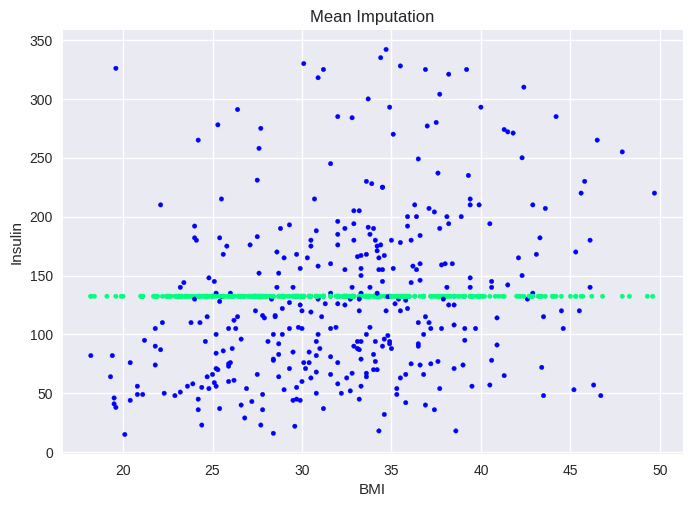

In [ ]:
plt.style.use('seaborn')
fig = plt.Figure()
null_values = df['Insulin'].isnull()
fig = df_mean.plot(x="BMI", y='Insulin', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Mean Imputation', colorbar=False)

2.2) Median İmputation

In [ ]:
df_median = df.copy()

In [ ]:
round(df_median['Insulin'].median(), 2)

120.0

In [ ]:
median_imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='median')
df_median['Insulin'] = median_imputer.fit_transform(
    df_median['Insulin'].values.reshape(-1,1))

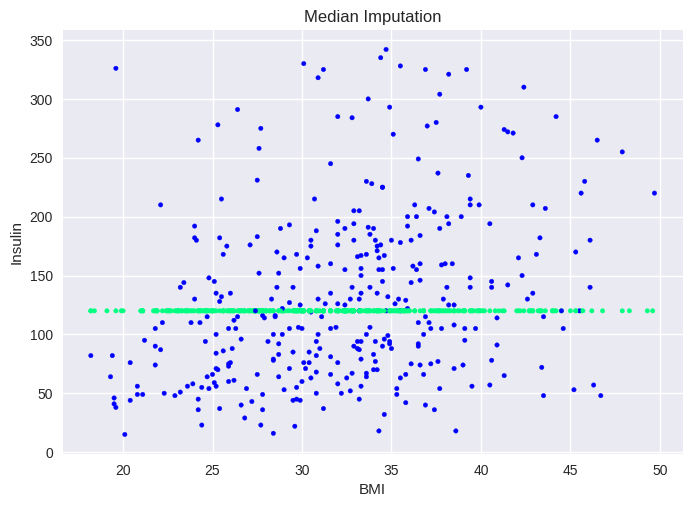

In [ ]:
plt.style.use('seaborn')
fig = plt.Figure()
null_values = df['Insulin'].isnull()
fig = df_median.plot(x="BMI", y='Insulin', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Median Imputation', colorbar=False)